<font color = green >

# Evaluation
</font>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib notebook

<font color = green >

## Digits dataset 
</font>

In [3]:
from sklearn.datasets import load_digits
# 32x32 bitmaps are divided into nonoverlapping blocks of 4x4 
# and the number of pixels on are counted in each block.
# This generates an input matrix of 8x8 where each element is an integer in the range 0..16. 
# This reduces dimensionality and gives invariance to small distortions.

In [4]:
digits = load_digits()
X, y, labels = digits.data, digits.target, digits.target_names
print ('X.shape= ', X.shape)
print ('y.shape= ', y.shape)
print ('X[0]=\n{}'.format(X[0,:]))


X.shape=  (1797, 64)
y.shape=  (1797,)
X[0]=
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [5]:
{label: count for label, count in zip(labels, np.bincount(y))}


{0: 178,
 1: 182,
 2: 177,
 3: 183,
 4: 181,
 5: 182,
 6: 181,
 7: 179,
 8: 174,
 9: 180}

<font color = green >

## Make it imbalanced
</font>

In [6]:
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0
{label: count for label, count in zip(labels, np.bincount(y_binary_imbalanced))}

{0: 1615, 1: 182}

In [7]:
from sklearn.model_selection import train_test_split

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X,y_binary_imbalanced, random_state = 3)
print ('X_train.shape= ',X_train.shape)
print ('X_test.shape= ',X_test.shape)
print ('y_train.shape= ',y_train.shape)
print ('y_test.shape= ',y_test.shape)

X_train.shape=  (1347, 64)
X_test.shape=  (450, 64)
y_train.shape=  (1347,)
y_test.shape=  (450,)


<font color = green >

## Accuracy of SVC
</font>

In [9]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf', C=1).fit(X_train, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))

/usr/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


train accuracy= 100.000%
test accuracy= 89.556%


<font color = green >

## Accuracy of Dummy classifier
</font>

In [10]:
from sklearn.dummy import  DummyClassifier
clf= DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
#  'most_frequent' will predict always class 0
print ('Check it predicts all zeros:')
clf.predict(X_test)[:30]

Check it predicts all zeros:


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))
clf_dummy_majority= clf

train accuracy= 89.978%
test accuracy= 89.556%


In [12]:
# Conclusion: SVC with rbf kernel is not better than dummy on test set

In [13]:
clf = SVC(kernel='linear', C=1).fit(X_train, y_train) # linear gives better results
print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))
clf_svc = clf

train accuracy= 100.000%
test accuracy= 96.222%


In [14]:
# Conclusion: Use dummy classifier as baseline to evaluate your model

In [15]:
# ->  *6

<font color = green >

## Confusion Matrix
</font>

<font color = green >

#### Ideal classifier  
</font>

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
confusion_matrix(y_test, y_test)

array([[403,   0],
       [  0,  47]])

<font color = green >

#### Dummy most majority
</font>

In [18]:
y_dummy_majority= clf_dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_dummy_majority)
confusion

array([[403,   0],
       [ 47,   0]])

<font color = green >

#### Dummy stratified
</font>

In [19]:
clf = DummyClassifier (random_state=0) #default: strategy='stratified'
clf.fit(X_train,y_train)
y_dummy_stratified = clf.predict(X_test)
confusion_matrix(y_test, y_dummy_stratified )

array([[358,  45],
       [ 42,   5]])

<font color = green >

#### SVC
</font>

In [20]:
y_svc= clf_svc.predict(X_test)
confusion_matrix(y_test, y_svc)

array([[387,  16],
       [  1,  46]])

<font color = green >

#### Logistic Regression
</font>

In [21]:
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression().fit (X_train, y_train)
y_lr= clf.predict(X_test)
confusion_matrix(y_test, y_lr)

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[394,   9],
       [  3,  44]])

<font color = green >

#### Decision Tree
</font>

In [22]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
y_dt = clf.predict(X_test)
confusion_matrix(y_test, y_dt)

array([[392,  11],
       [  5,  42]])

In [23]:
# ->  *10

<font color = green >

## Auxiliary drawing functions 
</font>

In [24]:

def plot_data_logistic_regression(X,y,legend_loc= None, title= None):
    '''
    :param X: 2 dimensional ndarray
    :param y:  1 dimensional ndarray. Use y.ravel() if necessary
    :return:
    '''

    positive_indices = (y == 1)
    negative_indices = (y == 0)
#     import matplotlib as mpl
    colors_for_points = ['grey', 'orange'] # neg/pos

    plt.scatter(X[negative_indices][:,0], X[negative_indices][:,1], s=40, c=colors_for_points [0], edgecolor = 'black', label='negative', alpha = 0.7)
    plt.scatter(X[positive_indices][:,0], X[positive_indices][:,1], s=40, c=colors_for_points [1], edgecolor = 'black',label='positive', alpha = 0.7)
    plt.title(title)
    plt.legend(loc= legend_loc)
    
def draw_linear_decision_boundaries_multiclass(clf,X):
    '''draws only the line  - use existing figure for it '''
    colors=  ['green','grey', 'orange', 'brown']
    x_line = np.linspace(X[:,0].min(),X[:,0].max(), 100)
    for w, b, color in zip(clf.coef_, clf.intercept_, colors):
        # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b,
        # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a
        # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
        y_line = -(x_line  * w[0] + b) / w[1]
        ind = (X[:,0].min()< x_line) & (x_line <X[:,0].max()) & (X[:,1].min()< y_line) & (y_line <X[:,1].max() )
        plt.plot(x_line[ind] , y_line[ind], '-', c=color, alpha=.8)

    
def plot_decision_boundary_universal(clf, X_train, y_train, X_test=None, y_test= None, title=None, precision=0.1,plot_symbol_size = 50, ax= None,  is_extended=True, labels= None, features =None, is_to_show_train= True):
    '''
    expected to be universal for binary and multiclass classification but not tested for binary 
    '''
    # Create color maps - required by pcolormesh
    from matplotlib.colors import  ListedColormap
    features_number= X_train.shape[1]
    colors_for_areas= colors_for_points =  np.array(['grey', 'orange', 'green', 'brown'][:features_number])
    cmap_light = ListedColormap(colors_for_areas)

    mesh_step_size = precision #.01  # step size in the mesh
    if X_test is None or y_test is None:
        show_test= False
        X= X_train
    else:
        show_test= True
        X= np.concatenate([X_train,X_test], axis=0)
    x1_min, x1_max = X[:, 0].min() - .1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - .1, X[:, 1].max() + 0.1
    # Create grids of pairs
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, mesh_step_size),
                         np.arange(x2_min, x2_max, mesh_step_size))
    # Flatten all samples
    target_samples_grid= (np.c_[xx1.ravel(), xx2.ravel()])
    if precision<0.05:
        print ('Calling to predict for all grid values (precision of drawing = {},\n you may configure to speed up e.g. precision=0.05)'.format(precision))
    Z = clf.predict(target_samples_grid)

    # Reshape the result to original meshgrid shape
    Z = Z.reshape(xx1.shape)

    if ax:
        plt.sca(ax)

    # Plot all meshgrid prediction
    plt.pcolormesh(xx1, xx2,Z, cmap = cmap_light, alpha=0.2)

    if is_to_show_train:
        # Plot train set
        plt.scatter(X_train[:, 0], X_train[:, 1], s=plot_symbol_size,
                    c=colors_for_points[y_train.astype(int)], edgecolor = 'black',alpha=0.6)
    # Plot test set
    if show_test:
        plt.scatter(X_test[:, 0], X_test[:, 1], marker='^', s=plot_symbol_size,
                c=colors_for_points[y_test.astype(int)],edgecolor = 'black',alpha=0.6)
    if  is_extended:
        
        # Create legend
        if labels is None:
            labels= ['negative','positive'] # assume this is for binary or for muticlass with labels 
        import matplotlib.patches as mpatches # use to assign lavels for colored points
        patches= [mpatches.Patch(color=colors_for_points[i], label=labels[i]) for i in range (len(labels))]
        plt.legend(handles=patches)
        if features is None:
            plt.xlabel('feature 1')
            plt.ylabel('feature 2')
        else: 
            plt.xlabel(features[0])
            plt.ylabel(features[1])

    else:
        plt.tick_params(
        top =False,
        bottom= False,
        left  = False,
        labelleft = False,
        labelbottom = False
        )
    plt.title(title)


<font color = green >

## Synthetic dataset
</font>

<IPython.core.display.Javascript object>


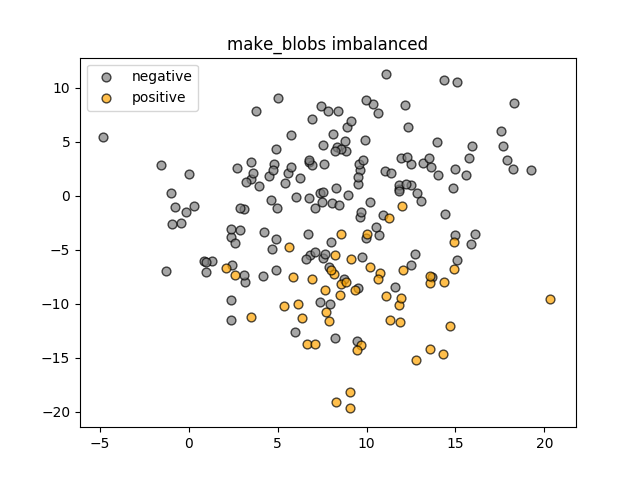

In [25]:
from sklearn.datasets import make_blobs
X_mk8, y_mk8 = make_blobs(n_samples = 200, n_features = 2, centers = 4, # centers impacts for y
                       cluster_std = 4, random_state = 4)
X = X_mk8
y = y_mk8 == 3 # make it imbalanced 
plt.figure()
plot_data_logistic_regression(X,y, title='make_blobs imbalanced')

<font color = green >

### Logistic Regression
</font>

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = LogisticRegression().fit(X_train, y_train)
# draw_linear_decision_boundaries_multiclass(clf,X)

print("train accuracy= {:.3%}".format(clf.score (X_train,y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test,y_test)))


train accuracy= 84.000%
test accuracy= 94.000%


/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<IPython.core.display.Javascript object>


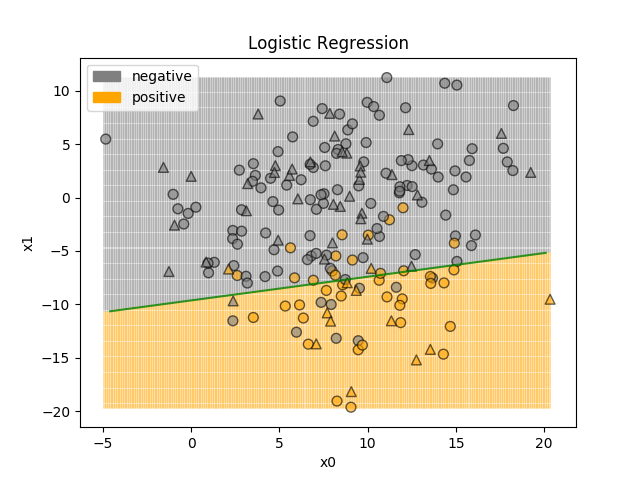

In [27]:
plt.figure()
plot_decision_boundary_universal(clf, X_train, y_train,X_test, y_test, title='Logistic Regression', precision=0.1,plot_symbol_size = 50, ax= None,labels= None, features =['x0', 'x1'])
draw_linear_decision_boundaries_multiclass(clf,X)

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

<font color = green >

### Perfromance on test set 
</font>

<IPython.core.display.Javascript object>


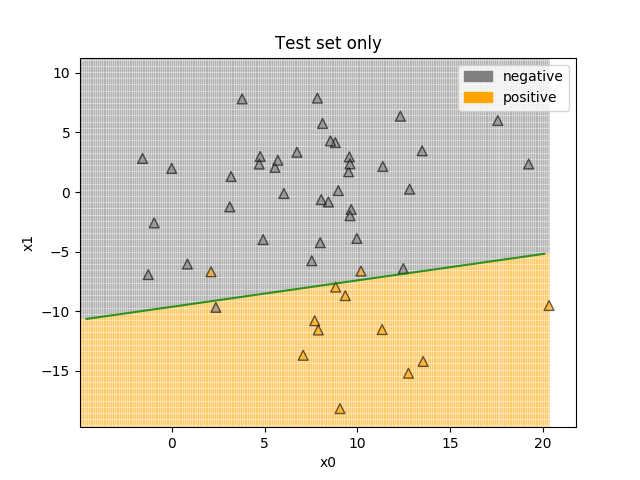

confusion_matrix:
 [[37  1]
 [ 2 10]]
recall_score = 0.83
precision_score = 0.91


In [30]:
# plot only test samples  to review  the confusiuon matrix 
plt.figure()
plot_decision_boundary_universal(clf, X_train= X_train, y_train= y_train, X_test=  X_test, y_test= y_test, title='Test set only', 
                                 precision=0.1,
                                 plot_symbol_size = 50, 
                                 ax= None,  
                                 is_extended=True, 
                                 labels= None, 
                                 features =['x0', 'x1'],
                                 is_to_show_train= False)
draw_linear_decision_boundaries_multiclass(clf,X)
y_predicted = clf.predict(X_test)
print ('confusion_matrix:\n',confusion_matrix(y_test, y_predicted))
print ('recall_score = {:.2}\nprecision_score = {:.2}'.format(
    recall_score(y_test, y_predicted),precision_score(y_test, y_predicted)))


<font color = green >

## Probabilty of prediction
</font>

In [31]:
clf = LogisticRegression().fit(X_train, y_train)
y_proba = clf.predict_proba(X_test)
y_pedicted = clf.predict(X_test)
df_proba = pd.DataFrame({'true_value':  y_test, 'predicted': y_predicted,'probability of 0': y_proba[:,0],'probability of 1': y_proba[:,1]})
df_proba.sample(10, random_state=10)

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,true_value,predicted,probability of 0,probability of 1
37,True,True,0.417109,0.582891
23,False,False,0.956078,0.043922
44,False,False,0.982009,0.017991
42,True,True,0.213881,0.786119
47,True,False,0.554316,0.445684
20,False,False,0.884879,0.115121
3,False,False,0.532526,0.467474
30,False,False,0.893071,0.106929
7,False,False,0.990469,0.009531
6,False,False,0.992538,0.007462


<font color = green >

### Changing threshold of prediction
</font>

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<IPython.core.display.Javascript object>


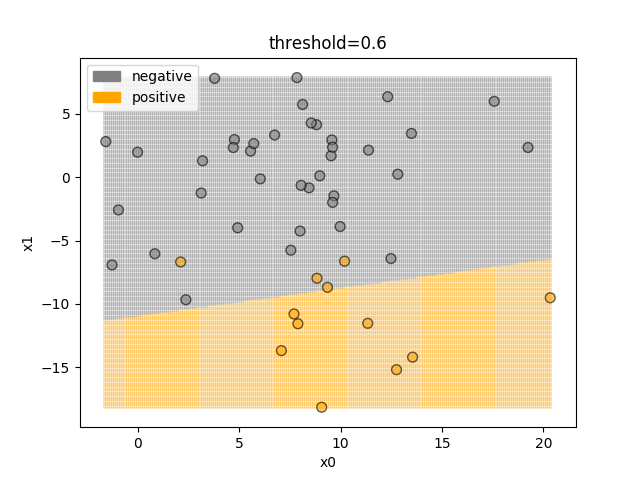

confusion_matrix:
 [[38  0]
 [ 4  8]]
recall_score = 0.67
precision_score = 1.0


In [32]:
y_proba_lr = clf.fit(X_train, y_train).predict_proba(X_test)
threshold=0.6 # 0.6 - for precision oriented # 0.3 - for recall oriented  
clf.predict = lambda X: clf.predict_proba(X)[:,1]>threshold

plt.figure()
plot_decision_boundary_universal(clf, X_test, y_test, title='threshold={}'.format(threshold), precision=0.1,plot_symbol_size = 50, ax= None,  is_extended=True, labels= None, features =['x0', 'x1'])

y_predicted = clf.predict(X_test)
print ('confusion_matrix:\n',confusion_matrix(y_test, y_predicted))
print ('recall_score = {:.2}\nprecision_score = {:.2}'.format(
    recall_score(y_test, y_predicted),precision_score(y_test, y_predicted)))


<font color = green >

### Decision function
</font>

In [33]:
clf = LogisticRegression().fit(X_train, y_train)
y_score = clf.decision_function(X_test)
y_pedicted = clf.predict(X_test)

df_dec_func = pd.DataFrame({'true_value':  y_test, 'predicted': y_predicted,'score': y_score})
df_dec_func.sample(10, random_state=10)


/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,true_value,predicted,score
37,True,False,0.334655
23,False,False,-3.080418
44,False,False,-3.999724
42,True,True,1.301689
47,True,False,-0.218125
20,False,False,-2.039472
3,False,False,-0.130288
30,False,False,-2.122499
7,False,False,-4.643650
6,False,False,-4.890379


<font color = green >

### Accuracy, Recall, Precision, F1-score

</font>

In [34]:
y_predicted = clf.predict(X_test)
print ('accuracy = {:.2}'.format(accuracy_score(y_test, y_predicted)))
print ('precision = {:.2}'.format(precision_score(y_test, y_predicted)))
print ('recall = {:.2}'.format(recall_score(y_test, y_predicted)))
print ('f1_score  = {:.2}'.format(f1_score(y_test, y_predicted)))

accuracy = 0.94
precision = 0.91
recall = 0.83
f1_score  = 0.87


<font color = green >

### Classification report 

</font>

In [35]:
from sklearn.metrics import classification_report

In [36]:
print (classification_report(y_test, y_predicted, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.95      0.97      0.96        38
    Positive       0.91      0.83      0.87        12

   micro avg       0.94      0.94      0.94        50
   macro avg       0.93      0.90      0.92        50
weighted avg       0.94      0.94      0.94        50



<font color = green >

#### Classification report  for dummy stratified classifier

</font>

In [37]:
clf = DummyClassifier (random_state=0).fit(X_train,y_train)
y_predicted = clf.predict(X_test)
print (confusion_matrix(y_test, y_predicted))
print (classification_report(y_test, y_predicted, target_names=['Negative', 'Positive']))

[[27 11]
 [10  2]]
              precision    recall  f1-score   support

    Negative       0.73      0.71      0.72        38
    Positive       0.15      0.17      0.16        12

   micro avg       0.58      0.58      0.58        50
   macro avg       0.44      0.44      0.44        50
weighted avg       0.59      0.58      0.59        50



In [38]:
# ->  *24

<font color = green >

### Precision Recall Curve

</font>

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<IPython.core.display.Javascript object>


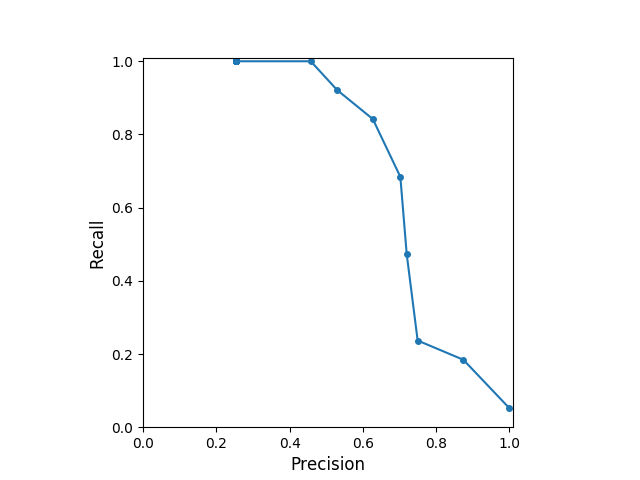

,recall,precision
threshold,,
-0.017282,1.000000,0.253333
0.104312,1.000000,0.457831
0.225905,0.921053,0.530303
0.347498,0.842105,0.627451
0.469091,0.684211,0.702703
0.590685,0.473684,0.720000
0.712278,0.236842,0.750000
0.833871,0.184211,0.875000
0.955465,0.052632,1.000000


In [42]:
clf = LogisticRegression().fit(X_train, y_train)
y_score = clf.decision_function(X_train)
thresholds = np.linspace(y_score.min()/4, y_score.max()/3.7, 20)

recall = []
precision= []
plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
for threshold in  thresholds:
    clf.predict = lambda X: clf.predict_proba(X)[:,1]>threshold
    recall.append(recall_score(y_train,clf.predict(X_train)))
    precision.append(precision_score(y_train,clf.predict(X_train)))
df = pd.DataFrame({'threshold':  thresholds, 'recall': recall,'precision': precision})


plt.plot(precision, recall, '-o', markersize = 4, label='Precision-Recall Curve')
plt.xlabel('Precision', fontsize=12)
plt.ylabel('Recall', fontsize=12)
plt.gca().set_aspect('equal')
# Avoid duplicates:  
df.groupby(['recall','precision']).last().reset_index().sort_values('threshold').set_index('threshold')


In [40]:
from sklearn.metrics import precision_recall_curve

closest_zero threshold : -0.005538881859358025


<IPython.core.display.Javascript object>


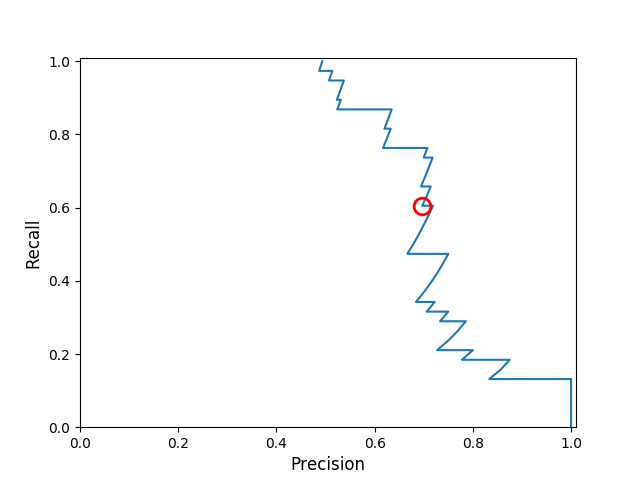

Text(0, 0.5, 'Recall')

In [43]:
# y_score = clf.decision_function(X_test)
# precision, recall, thresholds = precision_recall_curve(y_test, y_score)
 # Note: it is usually performed on test set this time it uses train test for purpose of demo 
y_score = clf.decision_function(X_train)
precision, recall, thresholds = precision_recall_curve(y_train, y_score)

# print ('precision\n', precision)
# print ('recall:\n', recall)
# print ('thresholds:\n', thresholds)
closest_zero = np.argmin(np.abs(thresholds)) # the closest to zero refers to the default threshold of classifier
print ('closest_zero threshold : {}'.format(thresholds [closest_zero]))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, '-', markersize = 4, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=2)
plt.xlabel('Precision', fontsize=12)
plt.ylabel('Recall', fontsize=12)

In [ ]:
# ->  *25

<font color = green >

### Receiver operating characteristic (ROC) curve 

</font>

In [44]:
from sklearn.metrics import roc_curve, auc # Receiver operating characteristic

<IPython.core.display.Javascript object>


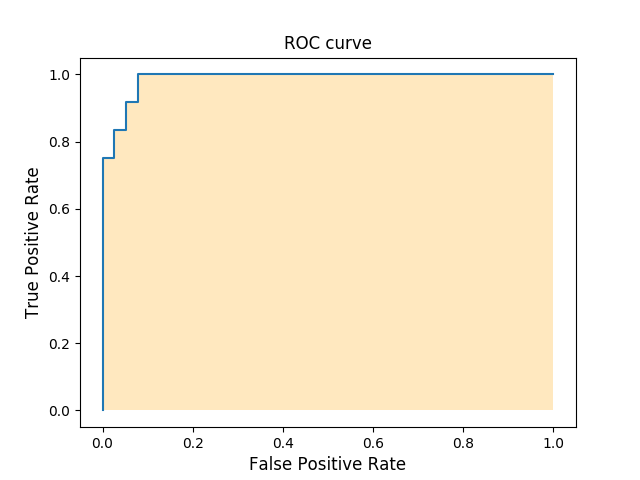

Text(0.5, 1.0, 'ROC curve')

In [45]:
y_score = clf.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score) # third param is threshold
plt.figure()
plt.plot(fpr, tpr, '-', markersize = 4, label='Precision-Recall Curve')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title ('ROC curve')

In [ ]:
# ->  *26

<font color = green >

### AUC score

</font>

In [46]:
plt.fill_between(fpr,0,tpr, facecolors='orange',alpha=0.25)
roc_auc = auc(fpr, tpr) # Compute Area Under the Curve (AUC) using the trapezoidal rule
print ('roc_auc = {:.4}'.format(roc_auc))

roc_auc = 0.9868


<font color = green >

#### Direct roc_auc_score function

</font>

In [47]:
from sklearn.metrics import roc_auc_score
print('AUC: ', roc_auc_score(y_test, y_score)) 

AUC:  0.9868421052631579


In [48]:
# -> 27

<font color = green >

## Multi-class confusion matrix

</font>

In [51]:
import seaborn as sns

<IPython.core.display.Javascript object>


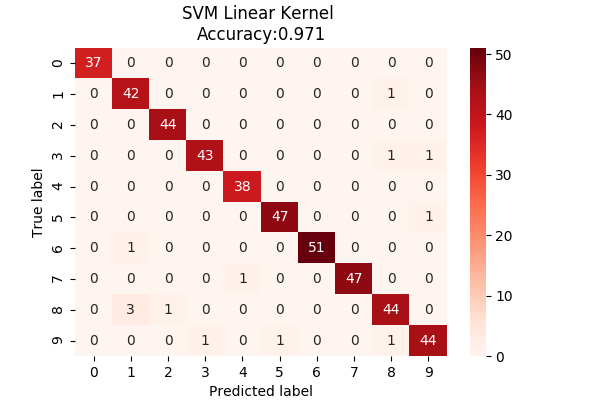

Text(0.5, 14.722222222222216, 'Predicted label')

In [52]:
digits = load_digits()
X, y, labels = digits.data, digits.target, digits.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = SVC(kernel = 'linear').fit(X_train, y_train)
y_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, y_predicted)
df = pd.DataFrame(confusion,index = np.arange(10), columns = np.arange(10))

plt.figure(figsize=(6,4))
sns.heatmap(df, annot=True, cmap='Reds') #  "YlGnBu")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test,y_predicted)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

<font color = green >

#### RBF kernel

</font>

/usr/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<IPython.core.display.Javascript object>


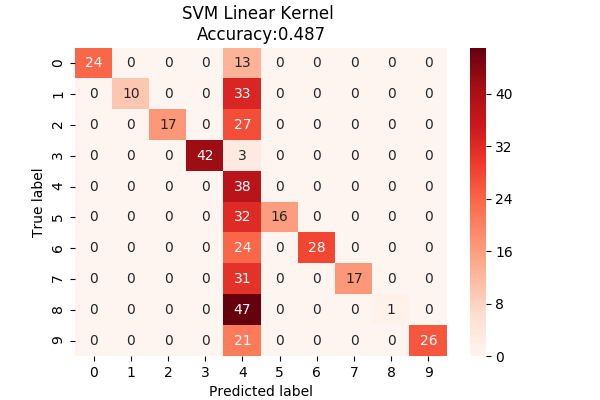

Text(0.5, 14.722222222222216, 'Predicted label')

In [53]:
clf = SVC().fit(X_train, y_train)
y_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, y_predicted)
df = pd.DataFrame(confusion,index = np.arange(10), columns = np.arange(10))

plt.figure(figsize=(6,4))
sns.heatmap(df, annot=True, cmap='Reds') #  "YlGnBu")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test,y_predicted)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

<font color = green>

### Classification report  

</font>



In [54]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79        37
           1       1.00      0.23      0.38        43
           2       1.00      0.39      0.56        44
           3       1.00      0.93      0.97        45
           4       0.14      1.00      0.25        38
           5       1.00      0.33      0.50        48
           6       1.00      0.54      0.70        52
           7       1.00      0.35      0.52        48
           8       1.00      0.02      0.04        48
           9       1.00      0.55      0.71        47

   micro avg       0.49      0.49      0.49       450
   macro avg       0.91      0.50      0.54       450
weighted avg       0.93      0.49      0.54       450



In [55]:
# -> 30

<font color = green >
    
## Average metrics

</font>



<font color = green >
    
#### Average precision

</font>



In [56]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test, y_predicted, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test, y_predicted, average = 'macro')))



Micro-averaged precision = 0.49 (treat instances equally)
Macro-averaged precision = 0.91 (treat classes equally)


<font color = green >
    
#### Average F1- score

</font>



In [57]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(y_test, y_predicted, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(y_test, y_predicted, average = 'macro')))


Micro-averaged f1 = 0.49 (treat instances equally)
Macro-averaged f1 = 0.54 (treat classes equally)


In [58]:
# -> 33

<font color = green>

##  Cross validation score
</font>



In [59]:
from sklearn.model_selection import cross_val_score
# from sklearn.neural_network import MLPClassifier

In [60]:
digits = load_digits()
X, y, labels = digits.data, digits.target, digits.target_names
y = y == 1
clf = SVC(kernel='linear', C=1)
# clf = SVC()
# clf = MLPClassifier()


print('Cross-validation (accuracy)', cross_val_score(clf, X, y, cv=5))
print('Cross-validation (AUC)', cross_val_score(clf, X, y, cv=5, scoring = 'roc_auc'))
print('Cross-validation (recall)', cross_val_score(clf, X, y, cv=5, scoring = 'recall'))


Cross-validation (accuracy) [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
Cross-validation (AUC) [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
Cross-validation (recall) [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]
